### En esta actividad trabajarás con el conjunto de datos asignado para el reto. Tienes que replicar los pasos vistos durante las horas de clase en un conjunto de datos diferente.

### Alejandro Mariacca Santin - A01654102

### 1. Carga los datos usando tu lector de csv o con pandas. Es recomendable hacerlo con pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("avocado.csv") 

### 2. Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.

In [2]:
df = pd.DataFrame(data)

print("Número de datos:", len(df.index))

print("\nVariables de los vectores y sus tipos de datos: ")
df.dtypes

Número de datos: 18249

Variables de los vectores y sus tipos de datos: 


Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

### 3. Analiza las variables para saber qué representa cada una y en qué rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.

##### Análisis

A pesar de no contar con contexto suficiente, es posible deducir algunos de los significados de las variables. En general, las variables están relacionadas con los aguacates, tal y como el nombre del archivo dice. Se pueden encontrar entre otras cosas, volumen total de aguacates, tipos de aguacates por código, tipos de bolsas y el año. Lamentablemente no se tiene conocimiento de la función de todas las variables. En el caso específico de la variable "Unnamed: 0", se deconoce por completo su propótiso. 

Como se verá a continuación, el rango varía colosalmente entre la mayoría de las variables.

##### Mínimos y máximos

In [3]:
df.describe().loc[['min','max']]


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
min,0.0,0.44,84.56,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2015.0
max,52.0,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.8,5719096.61,551693.65,2018.0


##### Comparación del máximo precio promedio por año

Obtener precios mayores por año

In [4]:
#Precios máximos por año en tabla
idx = df.groupby(lambda x: df['year'][x])["AveragePrice"].idxmax()

df.loc[idx]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11320,10,2015-10-18,2.79,12642.11,961.55,11680.56,0.0,0.00,0.00,0.00,0.0,organic,2015,SanFrancisco
14125,8,2016-10-30,3.25,16700.94,2325.93,11142.85,0.0,3232.16,3232.16,0.00,0.0,organic,2016,SanFrancisco
17428,37,2017-04-16,3.17,3018.56,1255.55,82.31,0.0,1680.70,1542.22,138.48,0.0,organic,2017,Tampa
18116,11,2018-01-07,2.30,20151.24,10165.34,8042.56,0.0,1943.34,1943.34,0.00,0.0,organic,2018,SanFrancisco


###### Gráficas

Por último, se graficará una tabla que demuestre alguna correlación entre variables, como lo será el caso de el precio en promedio por año.

In [5]:
#Precios máximos por año en lista
averageList = df.groupby(df.year)['AveragePrice'].max()
print(averageList)

year
2015    2.79
2016    3.25
2017    3.17
2018    2.30
Name: AveragePrice, dtype: float64


In [6]:
#Precios minimos por año en tabla
idxMin = df.groupby(lambda x: df['year'][x])["AveragePrice"].idxmin()

df.loc[idxMin]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1716,0,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,conventional,2015,PhoenixTucson
4566,42,2016-03-06,0.51,1442973.47,1037699.01,259846.68,14567.40,130860.38,76814.40,54045.98,0.00,conventional,2016,PhoenixTucson
15261,43,2017-03-05,0.44,64057.04,223.84,4748.88,0.00,59084.32,638.68,58445.64,0.00,organic,2017,CincinnatiDayton
8694,0,2018-03-25,0.56,2120511.03,837700.97,162473.38,4190.48,1116146.20,952254.70,161188.17,2703.33,conventional,2018,Houston


In [7]:
#Precios minimos por año en lista
averageListMin = df.groupby(df.year)['AveragePrice'].min()
print(averageListMin)

year
2015    0.49
2016    0.51
2017    0.44
2018    0.56
Name: AveragePrice, dtype: float64


Preparar datos para hacer gráfica

In [8]:
minAveragePrice = list(averageListMin)
maxAveragePrice = list(averageList)

Graficar

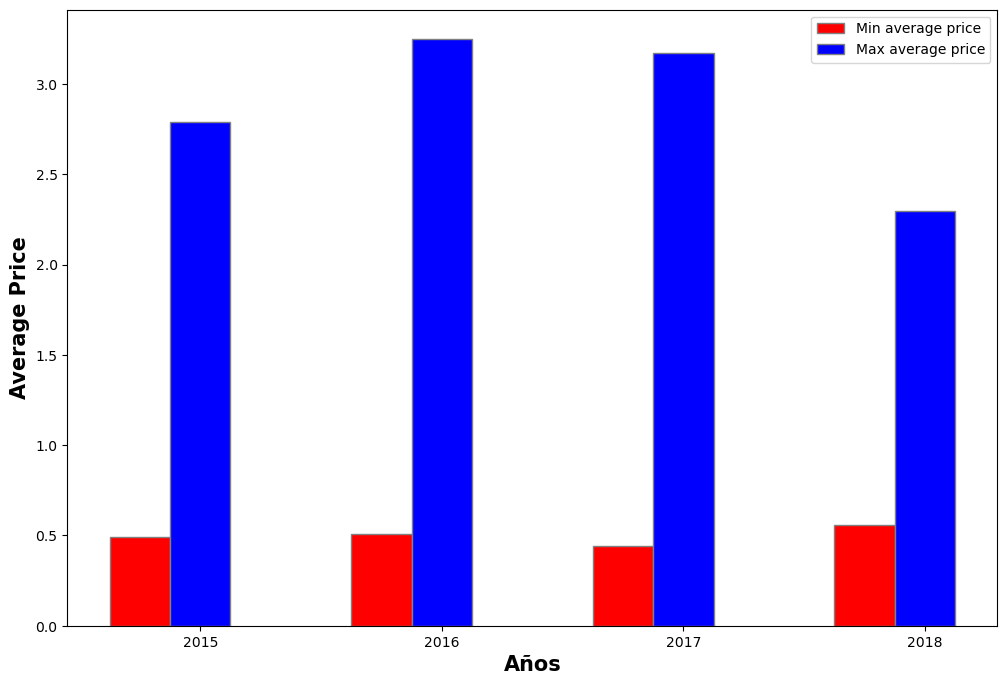

In [9]:
#data = [minAveragePrice, maxAveragePrice]
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(minAveragePrice))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, minAveragePrice, color ='r', width = barWidth,
        edgecolor ='grey', label ='Min average price')
plt.bar(br2, maxAveragePrice, color ='b', width = barWidth,
        edgecolor ='grey', label ='Max average price')
 
# Adding Xticks
plt.xlabel('Años', fontweight ='bold', fontsize = 15)
plt.ylabel('Average Price', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(minAveragePrice))],
        ['2015', '2016', '2017', '2018'])
 
plt.legend()
plt.show()

### 4. Basándose en la media, mediana y desviación estándar de cada variable, ¿Qué conclusiones puedes entregar de los datos?

In [10]:
median = df.median(numeric_only=True)
medianDF = pd.DataFrame([median], columns=median.index)

desc = df.describe().loc[['mean','std']]

print("Media, desviación estandar y mediana: ")
newDF = pd.concat([desc, medianDF])
newDF.rename(index={0: "mean", 1: "std", 2: "median"})

Media, desviación estandar y mediana: 


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,22839.735993,239639.202060,182194.686696,54338.088145,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,107464.068435,986242.399216,746178.514962,243965.964547,17692.894652,0.939938
mean,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,184.990000,39743.830000,26362.820000,2647.710000,0.000000,2016.000000


Los datos permiten encontrar varias particularidades así como también permiten hacer predicciones tomando en cuenta la información presentada. Un análisis más a profundidad podría revelar tendencias que por ahora son desconodias.